# Distance relations

>Distance is a continuous variable

In [1]:
import geopandas as gpd 
from helpers import nz_height, canterbury, nz
%matplotlib inline 
import matplotlib.pyplot as plt 

In [2]:
nz_highest = nz_height.sort_values(by='elevation', 
                     ascending=False).iloc[:3, :]
nz_highest

,t50_fid,elevation,geometry
64,2372236,3724,POINT (1369317.63 5169132.284)
63,2372235,3717,POINT (1369512.866 5168235.616)
67,2372252,3688,POINT (1369381.942 5168761.875)


In [3]:
canterbury.iloc[0]

Name                                                    Canterbury
Island                                                       South
Land_area                                             44504.499091
Population                                                612000.0
Median_income                                                30100
Sex_ratio                                                 0.975327
geometry         MULTIPOLYGON (((1686901.9139 5353232.6602, 167...
Name: 0, dtype: object

In [4]:
canterbury_centroid = canterbury.centroid.iloc[0]

>Calculate the distance from each of the three elevation points

In [5]:
nz_highest.distance(canterbury_centroid)

64    115539.995747
63    115390.248038
67    115493.594066
dtype: float64

>A distance matrix is a pairwise set of distances between all feature combinations

In [6]:
sel = nz.Name.str.contains('Canter|Otag')
co = nz[sel]
print(co)

          Name Island     Land_area  Population  Median_income  Sex_ratio  \
10  Canterbury  South  44504.499091    612000.0          30100   0.975327   
11       Otago  South  31186.309188    224200.0          26300   0.951169   

                                             geometry  
10  MULTIPOLYGON (((1686901.914 5353232.66, 167999...  
11  MULTIPOLYGON (((1335204.789 5126878.25, 133695...  


In [7]:
d = nz_height.iloc[:3, :].apply(
    lambda x: co.distance(x.geometry), axis=1
)
print(d)

              10            11
0  123537.158269  15497.717252
1   94282.773074      0.000000
2   93018.560814      0.000000


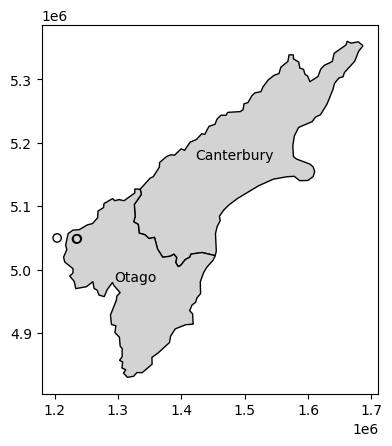

In [11]:
fig, ax = plt.subplots() 
co.plot(ax=ax, color='lightgrey', edgecolor='k')
co.apply(
    lambda x: ax.annotate(
        text=x.Name, 
        xy = x.geometry.centroid.coords[0], 
        ha='center'
    ), 
    axis=1
)
nz_height.iloc[:3,:].plot(ax=ax, color='none', edgecolor='k');